# Импорт библиотек

Импортируем необходимые библиотеки:

1 tensorflow - библиотека глубокого обучения

2 os - модуль для работы с операционной системы

3 numpy - для поддержки математических функции

4 PIL - для работы с растровой графикой

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

from PIL import Image

**Прежде чем запускать эту программу**

Тут необходимо вручную скачать  из  гугл драйва:

"https://drive.google.com/file/d/130_8bj-fzLJZWADGuu_fGOTZL3S8TnEG/view?usp=sharing"

Файл сохранить на своем локальном облаке в папку: /Colab Notebooks/model.tgz

Тогда всё будет нормально работать :)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
### IDK why, but it's wont work :(

import pathlib
#dataset_url = "https://drive.google.com/file/d/130_8bj-fzLJZWADGuu_fGOTZL3S8TnEG/view?usp=sharing"
#!unzip dataset_url
#data_dir = tf.keras.utils.get_file(origin=dataset_url,
#                                   fname='model',
#                                   untar=True)
#data_dir = pathlib.Path(data_dir)
data_dir = pathlib.Path('/content/model')

В архиве находится папка: model

Внутри находится папки: Ania   Irina  Trang  Others. 
Задача сосстоит в том, чтобы программа определял 4-х моделей.

Для "Ania   Irina  Trang" вызываем: True

Для "Others" вызываем: False

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/model.tgz"

Archive:  /content/drive/MyDrive/Colab Notebooks/model.tgz
   creating: model/Ania/
  inflating: model/Ania/26_02_2021-1678.jpg  
  inflating: model/Ania/26_02_2021-1712.jpg  
  inflating: model/Ania/26_02_2021-1767.jpg  
  inflating: model/Ania/26_02_2021-1827.jpg  
  inflating: model/Ania/26_02_2021-1843.jpg  
  inflating: model/Ania/26_02_2021-1846.jpg  
  inflating: model/Ania/26_02_2021-1881.jpg  
   creating: model/Irina/
  inflating: model/Irina/12_07_2021-4223.jpg  
  inflating: model/Irina/12_07_2021-4290.jpg  
  inflating: model/Irina/12_07_2021-4309.jpg  
  inflating: model/Irina/12_07_2021-4402.jpg  
  inflating: model/Irina/12_07_2021-4492.jpg  
  inflating: model/Irina/12_07_2021-4556.jpg  
  inflating: model/Irina/12_07_2021-4656.jpg  
   creating: model/Trang/
  inflating: model/Trang/5.jpg       
  inflating: model/Trang/DSCF7518.jpg  
  inflating: model/Trang/DSCF7533_PS.jpg  
  inflating: model/Trang/DSCF7540.jpg  
  inflating: model/Trang/DSCF7545_PS.jpg  
  inflati

In [ ]:
cd model

/content/model


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

28


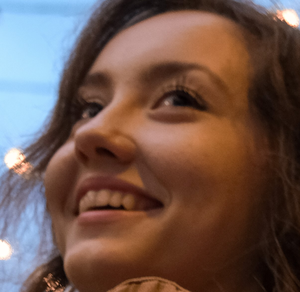

In [ ]:
roses = list(data_dir.glob('Irina/*'))
basewidth = 300
img = PIL.Image.open(str(roses[6]))
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img.resize((basewidth,hsize), Image.ANTIALIAS)

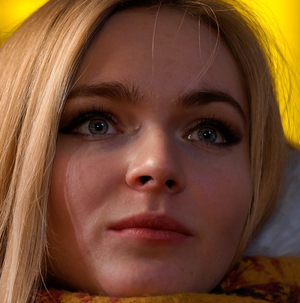

In [ ]:
roses = list(data_dir.glob('Ania/*'))
basewidth = 300
img = PIL.Image.open(str(roses[5]))
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img.resize((basewidth,hsize), Image.ANTIALIAS)

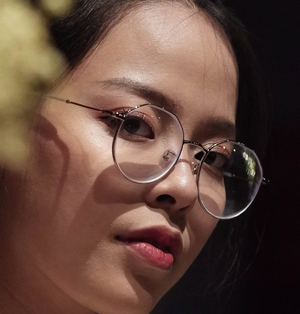

In [ ]:
roses = list(data_dir.glob('Trang/*'))
basewidth = 300
img = PIL.Image.open(str(roses[2]))
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img.resize((basewidth,hsize), Image.ANTIALIAS)

# Предварительная обработка изображений

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 28 files belonging to 4 classes.
Using 23 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 28 files belonging to 4 classes.
Using 5 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Ania', 'Irina', 'Others', 'Trang']


Class pictures:


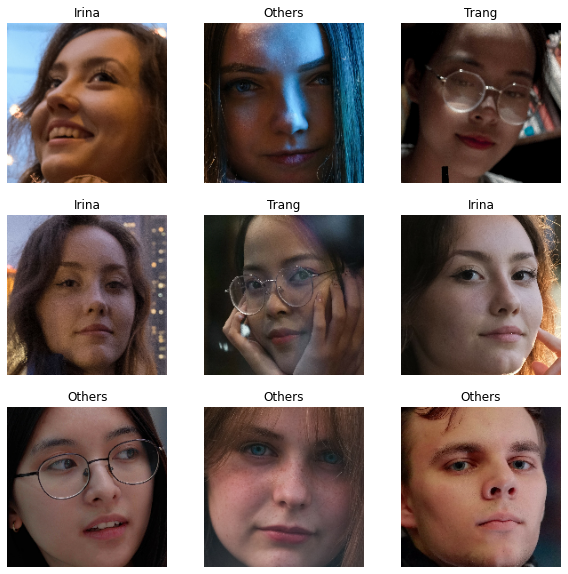

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
print('Class pictures:')    

In [ ]:
images[4].shape

TensorShape([180, 180, 3])

# Создание сети

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(23, 180, 180, 3)
(23,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Model.fit можно запустить по несколько раз. Точность прогноза с каждым эпохом увеличивается. Аccuracy при некотором итерраци получается равной 1.0 . Это плохо, так как свидетельствует об переобучении.

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=6
)

Epoch 1/6
1/1 [==============================] - 11s 11s/step - loss: 1.4042 - accuracy: 0.2609 - val_loss: 1.6216 - val_accuracy: 0.2000
Epoch 2/6
1/1 [==============================] - 0s 47ms/step - loss: 1.3600 - accuracy: 0.2609 - val_loss: 1.4702 - val_accuracy: 0.4000
Epoch 3/6
1/1 [==============================] - 0s 41ms/step - loss: 1.1949 - accuracy: 0.5217 - val_loss: 1.3285 - val_accuracy: 0.4000
Epoch 4/6
1/1 [==============================] - 0s 41ms/step - loss: 1.0905 - accuracy: 0.6522 - val_loss: 1.2685 - val_accuracy: 0.6000
Epoch 5/6
1/1 [==============================] - 0s 43ms/step - loss: 0.9163 - accuracy: 0.9130 - val_loss: 1.2314 - val_accuracy: 0.2000
Epoch 6/6
1/1 [==============================] - 0s 40ms/step - loss: 0.7003 - accuracy: 0.8696 - val_loss: 1.2333 - val_accuracy: 0.4000


# Обучение

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

# Результат

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(train_ds)

In [ ]:
np.argmax(predictions[6])

2

In [38]:
def get_weight(i):
  if np.argmax(predictions[i])==0:
    XXX= str('Ania')
    
  else:

    if np.argmax(predictions[i])==1:  
      XXX= str('Irina')   
      
    else:
        if np.argmax(predictions[i])==2:
          XXX= str('Others')   
          
        else:
          XXX= str('Trang')
          
  return XXX

Правильно брать test_ds, a не train_ds. Но так как тестовые немного, поэтому я решил посмотреть, что на train_ds.

Predicted result: 


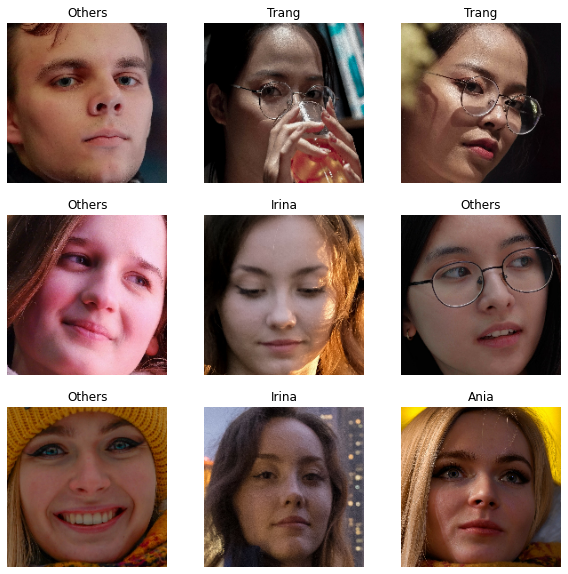

In [39]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(get_weight(i))
    plt.axis("off")

print('Predicted result: ')

Hi, Irina. The door is opened


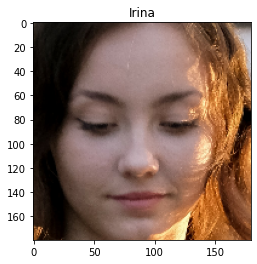

In [46]:
i=4
plt.imshow(images[i].numpy().astype("uint8"))
plt.title(get_weight(i))

if get_weight(i)=='Others':
  print('False. Расстрееел!!!!')
else:
  print('Hi, ' + str(get_weight(i)) + '. The door is opened')

False. Расстрееел!!!!


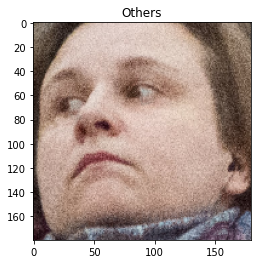

In [45]:
i=10
plt.imshow(images[i].numpy().astype("uint8"))
plt.title(get_weight(i))

if get_weight(i)=='Others':
  print('False. Расстрееел!!!!')
else:
  print('Hi, ' + str(get_weight(i)) + '. The door is opened')

# Вывод

Нейросеть выдает верные результаты прогноза. Train_accuracy составляет равной 0.87. Test_accuracy составляет равной 0.4. Значение в 4 эпохе было 0.6, что свидетельсвует об переобучение.

Для повышения точности прогноза существуют различные решения:

1) Создать большой датасет. Хотя бы 1000 фотографий, а не 21.

2) Произвести рандомные геометрические преобразования изображений. Например через: 
tf.keras.preprocessing.image.random_rotation;
tf.keras.layers.RandomZoom;
tf.keras.layers.RandomFlip;
tf.image.random_brightness.

3) Реализовать различные методы устранения переобучения: "Drop out", "Test split" "Smote" "Ensemble" и т.д.

---

